# Forecast use of a city bikeshare system

## Exploratory data analysis

In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

In [7]:
# create dataframe and preview hourly data

df = pd.read_csv("train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# check datatypes for columns

df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
# convert datetime to proper type

df['datetime_converted'] = pd.to_datetime(df.datetime)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_converted
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [10]:
# check the types again

df.dtypes

datetime                      object
season                         int64
holiday                        int64
workingday                     int64
weather                        int64
temp                         float64
atemp                        float64
humidity                       int64
windspeed                    float64
casual                         int64
registered                     int64
count                          int64
datetime_converted    datetime64[ns]
dtype: object

In [11]:
# now drop old datetime column

df.drop('datetime', axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_converted
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [12]:
# rename converted datetime column to original name

df.rename(columns={'datetime_converted': 'datetime'}, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [13]:
# move datetime back to the first column position

hour_col = df['datetime']
df.drop('datetime', axis=1, inplace=True)
df.insert(0, 'datetime', hour_col)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
# how many rows do we have

df.shape

(10886, 12)

In [16]:
# basic statistics for all columns

df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-06-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [17]:
# are there any NaN values?

df.isnull().values.any()

False

In [34]:
# create new columns for hour of day, month number, day of week number, and year
# drop the datetime column since the important parts have been extracted

df["hour"] = df.datetime.dt.hour
df["month"] = df.datetime.dt.month
df["dow"] = df.datetime.dt.dayofweek # Monday=0, Sunday=6
df["year"] = df.datetime.dt.year
df.drop("datetime", axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,dow,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,5,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,5,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,5,2011


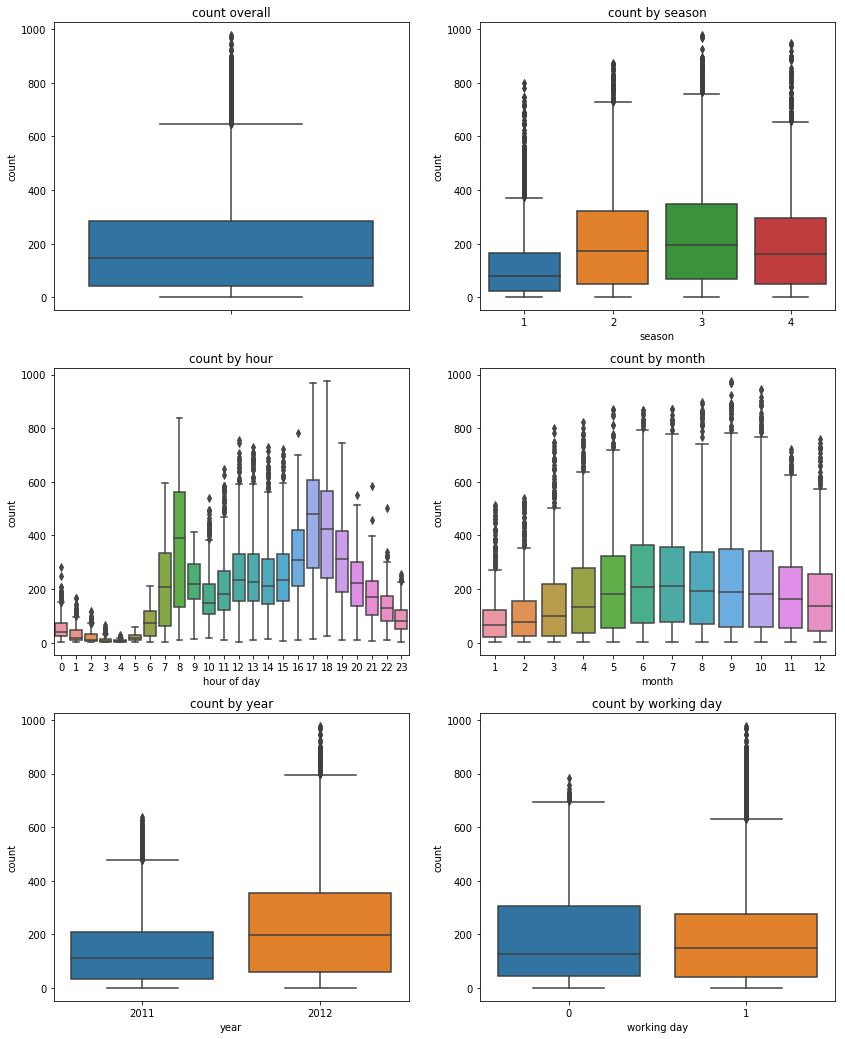

In [45]:
# create boxplots for "count" (hourly bikeshare users) overall and by season, hour, month, year, and working day
# this will help spot outliers

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(14, 18)
sns.boxplot(data=df, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=df, y="count", x="season", orient="v", ax=axes[0][1])
sns.boxplot(data=df, y="count", x="hour", orient="v", ax=axes[1][0])
sns.boxplot(data=df, y="count", x="month", orient="v", ax=axes[1][1])
sns.boxplot(data=df, y="count", x="year", orient="v", ax=axes[2][0])
sns.boxplot(data=df, y="count", x="workingday", orient="v", ax=axes[2][1])

axes[0][0].set(ylabel="count", title="count overall")
axes[0][1].set(xlabel="season", ylabel="count", title="count by season")
axes[1][0].set(xlabel="hour of day", ylabel="count", title="count by hour")
axes[1][1].set(xlabel="month", ylabel="count", title="count by month")
axes[2][0].set(xlabel="year", ylabel="count", title="count by year")
axes[2][1].set(xlabel="working day", ylabel="count", title="count by working day")

**Some observations:**
* The overall plot shows that there's a lot of outliers in our data (points past the upper whisker)
* Spring (1) surprisingly has much lower bikeshare demand than other seasons
* There are spikes in usage between 7-9AM and 4-7PM which correspond with typical commute times; 10AM-3PM have a lot of outliers, I'm guessing this could be weekdays vs. weekends
* June through September appear to have the highest demand on average
* 2012 displays a significant lift in bikeshare usage compared to 2011
* There are far more outliers on working days compared to non-working days

*I'm not sure that the outliers should be removed just yet, since they may be meaningful for prediction, depending on the model used*

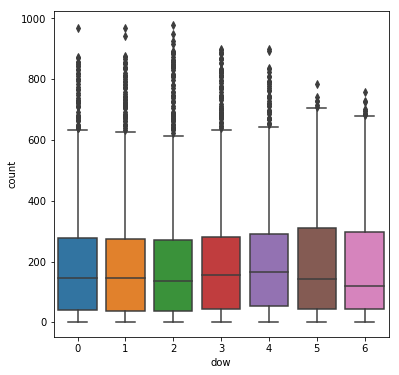

In [49]:
# see if there's more outliers on weekdays (0-4) or weekends (5-6)

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax = sns.boxplot(data=df, y="count", x="dow")

This confirms weekdays (not just working days) have the most outliers. I'm going to keep them for now, and maybe later will remove them if necessary to see how it affects model accuracy.

 None]

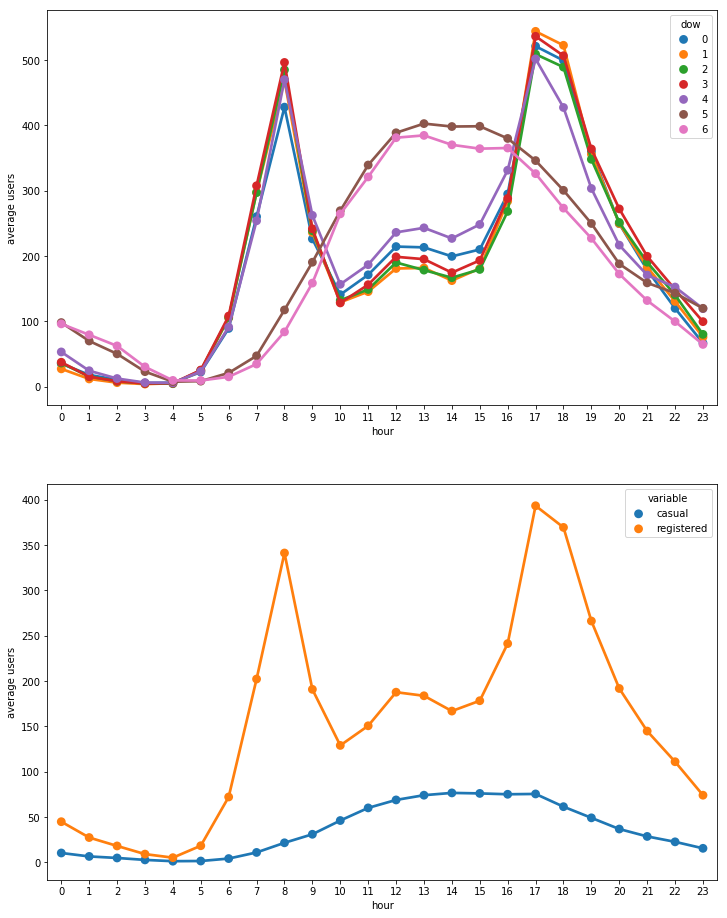

In [63]:
# another view: plot weekday vs. weekend and casual vs. registered average users per hour

fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(12,16)

hour_agg = pd.DataFrame(df.groupby(["hour","dow"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_agg["hour"], y=hour_agg["count"], hue=hour_agg["dow"], data=hour_agg, join=True, ax=ax1)
ax1.set(xlabel="hour", ylabel="average users", label="big")

hour_trans = pd.melt(df[["hour","casual","registered"]], id_vars=["hour"], value_vars=["casual", "registered"])
hour_agg = pd.DataFrame(hour_trans.groupby(["hour","variable"], sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hour_agg["hour"], y=hour_agg["value"], hue=hour_agg["variable"], hue_order=["casual","registered"], data=hour_agg, join=True, ax=ax2)
ax2.set(xlabel="hour", ylabel="average users", label="big")

It's pretty clear that weekend usage has a very different hourly pattern than weekdays. Weekend usage tends to be later in the day, is fairly consistent for at least 6 hours, and only has a single peak; whereas weekday usage is mostly aligned with commute times (two spikes) with a small relative lift around lunch hours. Also, it appears that generally weekday users are registered while weekend users are casual.

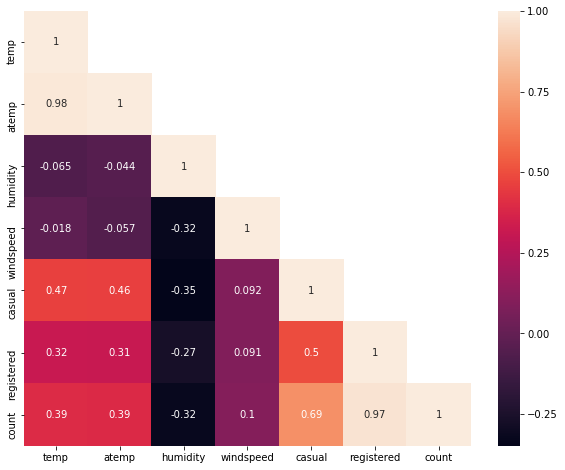

In [61]:
# show the correlation matrix for non-categorical (continuous) variables

corr_mat = df[["temp","atemp","humidity","windspeed","casual","registered","count"]].corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.heatmap(corr_mat, mask=mask, annot=True) #mask=mask,vmax=.8, square=True,

**Observations:**
* Temp and atemp are both moderately positively correlated with count, and there doesn't appear to be any meaningful difference, so one of them can be dropped
* Casual users are more affected by temp/atemp and humidity than registered users, which makes sense since these are likely "discretionary" trips vs. commuters
* Windspeed doesn't appear to have much of an impact on count, and the 0.1 positive correlation seems to go agaist intuition - cyclists don't typically prefer to bike on days with higher wind

*I'm going to keep temp and humidity, but drop atemp and windspeed for now. Also remove casual and registered since they won't be used for training.*

In [67]:
df.drop(['windspeed','atemp','casual','registered'], axis=1, inplace=True)
df.head()

## A little bit of Feature Engineering

In [70]:
# convert categorical season and weather columns to dummy variables (k-1 of k categorical levels)
# season:
#    1 = spring
#    2 = summer
#    3 = fall
#    4 = winter
# weather:
#    1 = Clear, Few clouds, Partly cloudy
#    2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#    3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#    4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

df = pd.get_dummies(df, prefix=['season','weather'], columns=['season','weather'], drop_first=True)
df.head()

,holiday,workingday,temp,humidity,count,hour,month,dow,year,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,0,0,9.84,81,16,0,1,5,2011,0,0,0,0,0,0
1,0,0,9.02,80,40,1,1,5,2011,0,0,0,0,0,0
2,0,0,9.02,80,32,2,1,5,2011,0,0,0,0,0,0
3,0,0,9.84,75,13,3,1,5,2011,0,0,0,0,0,0
4,0,0,9.84,75,1,4,1,5,2011,0,0,0,0,0,0


# Modeling

## Linear Regression

In [79]:
feature_cols = ['holiday','workingday','temp','humidity','hour','month','dow','year','season_2','season_3','season_4','weather_2','weather_3','weather_4']
X_mult = df[feature_cols]
y_mult = df['count']

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X_mult, y_mult, test_size=0.3, random_state=1)
print ("training data size:", X_train.shape)
print ("testing data size:", X_test.shape)

training data size: (7620, 14)
testing data size: (3266, 14)


In [134]:
# define Root Mean Squared Logarithmic Error (RMSLE) function for evaluating predictions
# it's throwing an "invalid value" error, due to a zero or negative passed to log

def sle(actual, predicted):
    """
    Taken from benhamner's Metrics library.
    Computes the squared log error.
    This function computes the squared log error between two numbers,
    or for element between a pair of lists or numpy arrays.
    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double or list of doubles
            The squared log error between actual and predicted
    """
    return (np.power(np.log(np.array(actual)+1) - 
            np.log(np.array(predicted)+1), 2))

def rmsle(targets, predictions):
    return np.sqrt((sle(targets, predictions)**2).mean())

In [136]:
# another version of RMSLE I tried, throwing same error

def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

In [137]:
# train on training set
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# generate predictions on training set and evaluate
y_pred_train = linreg.predict(X_train)
print ("training set RMSLE:", rmsle(y_train, y_pred_train))

# generate predictions on test set and evaluate
y_pred_test = linreg.predict(X_test)
print ("test set RMSLE:", rmsle(y_test, y_pred_test))

training set RMSLE: 1.17437348662
test set RMSLE: 1.14855327611


/Users/Arjun/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


*So I got the RMSLE functions to work by taking the absolute value of whatever's passed to log function (and reverted the functions back to their original state afterward). However I need to compare this output against Kaggle's calculations. More concerning is whether the "invalid value" is a zero or negative... if it's zero that could make sense, but the linear regression shouldn't be producing a negative.*

## Next steps

I'll move onto another notebook for modeling using the entire training data set. First I'll make predictions for the test set and see what the RMSLE output is for the Kaggle submission. Then I'll tweak the above RMSLE functions to replicate that error evaluation when using the contest's test set, rather than splitting the training set into train/test split.

Other things to try (higher priority in bold):
* remove outliers
* **feature scaling**
* eliminate skewness
* **polynomial features**
* decision tree
* **random forest**
* **ensembling**